<a href="https://colab.research.google.com/github/MohuaSinha/EVA4/blob/master/S10/S10_Solution_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd "//content/gdrive/My Drive/Colab Notebooks/EVA4/Mou_Library"
import sys
workingdir = '/content/gdrive/My Drive/Colab Notebooks/EVA4/Mou_Library'
sys.path.append(workingdir)

/content/gdrive/My Drive/Colab Notebooks/EVA4/Mou_Library


In [3]:
ls-ltr

total 107
-rw------- 1 root root 10701 Mar 14 15:13 dnnmodel.ipynb
drwx------ 3 root root  4096 Mar 14 15:38 data/
-rw------- 1 root root   791 Mar 19 07:11 displayimages.py
-rw------- 1 root root  2515 Mar 19 07:11 showimages.py
drwx------ 2 root root  4096 Mar 19 07:16 __pycache__/
-rw------- 1 root root  6346 Mar 21 19:33 datatransformation.ipynb
-rw------- 1 root root  9276 Mar 21 20:01 dnnmodel_old.py
-rw------- 1 root root  2227 Mar 21 20:39 utils.ipynb
-rw------- 1 root root  3588 Mar 21 22:04 quizdnnmodel.ipynb
-rw------- 1 root root  3572 Apr  2 16:00 gradcam.ipynb
-rw------- 1 root root  2942 Apr  2 16:08 gradcam.py
-rw------- 1 root root 19174 Apr  2 16:31 lr_finder.py
-rw------- 1 root root 21901 Apr  2 16:47 lr_finder.ipynb
-rw------- 1 root root  1054 Apr  2 16:54 config.ipynb
-rw------- 1 root root   738 Apr  2 17:05 config.py
-rw------- 1 root root  8534 Apr  4 19:39 train_test.ipynb
-rw------- 1 root root  4153 Apr  4 19:52 grad_visualize.ipynb



Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



In [4]:
!pip install import-ipynb
import import_ipynb
#from __future__ import print_function
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary
from torchsummary import summary
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

%matplotlib inline
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
from config import ModelConfig
import os

#Below are the created modules
import dnnmodel 
import train_test
import datatransformation 
import showimages
import displayimages
import gradcam
import grad_visualize 
import lr_finder
from utils import *
import plotresults
from torch.optim.lr_scheduler import StepLR

importing Jupyter notebook from dnnmodel.ipynb
importing Jupyter notebook from train_test.ipynb
importing Jupyter notebook from datatransformation.ipynb


  pip install torch-lr-finder -v --global-option="amp"


importing Jupyter notebook from grad_visualize.ipynb
importing Jupyter notebook from utils.ipynb


**Model Configuration and set SEED**

In [5]:
# View model config
args = ModelConfig()
args.print_config()

print()
# Set seed
init_seed(args)

Model Parameters:
{ 'batch_size_cpu': 128,
  'batch_size_cuda': 128,
  'dropout': 0.15,
  'epochs': 50,
  'l1_decay': 3e-06,
  'l2_decay': 0.001,
  'lr': 0.001,
  'momentum': 0.9,
  'num_workers': 4,
  'seed': 1}

CUDA Available


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [0]:
#train_transforms,test_transforms= datatransformation.load()
train_transforms , test_transforms=datatransformation.AlbumentationWrapper('train'), datatransformation.AlbumentationWrapper('test')

In [7]:
classes,trainloader, testloader = datatransformation.dataloaders(1, 128, 10, train_transforms , test_transforms)

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat   cat


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


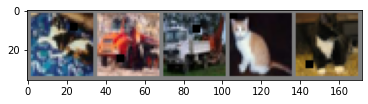

In [8]:
displayimages.show_random_image(trainloader,classes)

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [9]:
!pip install torchsummary
from torchsummary import summary

device = which_device()
model = dnnmodel.ResNet18()
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
model.to(model.device)
print(model.device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


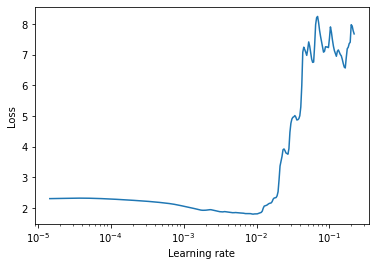

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=args.momentum)
lr_finder =lr_finder.LRFinder(model, optimizer, criterion, device=device)
lr_finder.range_test(trainloader,testloader, 1e-5, 2,num_iter=len(trainloader), step_mode="exp")
lr_finder.plot()
lr_finder.reset()

In [11]:
best_loss = lr_finder.best_loss
best_lr = lr_finder.history["lr"][lr_finder.history["loss"].index(best_loss)]
print("Best Loss: %s\nBest Learning Rate: %s" % (best_loss, best_lr))
args.lr = best_lr

Best Loss: 1.7992617919454499
Best Learning Rate: 0.009027374945840168


In [0]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
model =  dnnmodel.ResNet18().to(device)
optimizer = optim.SGD(model.parameters(), lr=args.lr, momentum=0.9)
#optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
#scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[30], gamma=0.1)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, threshold=0.004, patience = 1, verbose=True)
scheduler = ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=3,verbose=True, min_lr=1e-5)
epochs=50
input_size=(3,32,32)

In [0]:
def run(l1_decay=0.0, l2_decay=0.0):
  train_losses=[]
  test_losses = []
  train_accs=[]
  test_accs = []
  misclassified_imgs = []
  correct_imgs = []
  for epoch in range(epochs):
      print("EPOCH:", epoch)
      train_test.train(model, device, trainloader, optimizer,scheduler, epoch,False,best_loss)
      train_test.test(model, device, testloader,criterion, classes, test_losses, test_accs,misclassified_imgs,correct_imgs,epoch==args.epochs-1)        
      scheduler.step(test_losses[-1])
  return train_losses, train_accs, test_losses, test_accs, misclassified_imgs,correct_imgs

In [24]:
# train and test the model
train_losses, train_accs, test_losses, test_accs, misclassified_imgs,correct_imgs = run(l1_decay=args.l1_decay, l2_decay=args.l2_decay)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.0589087009429932 Batch_id=390 Accuracy=52.24: 100%|██████████| 391/391 [00:55<00:00,  7.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0083, Accuracy: 6227/10000 (62.27%)

EPOCH: 1


Loss=0.46705856919288635 Batch_id=390 Accuracy=72.04: 100%|██████████| 391/391 [00:56<00:00,  6.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0060, Accuracy: 7412/10000 (74.12%)

EPOCH: 2


Loss=0.6362640261650085 Batch_id=390 Accuracy=79.43: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]

Epoch     5: reducing learning rate of group 0 to 9.0274e-04.



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0056, Accuracy: 7608/10000 (76.08%)

EPOCH: 3


Loss=0.3896827697753906 Batch_id=390 Accuracy=86.88: 100%|██████████| 391/391 [00:56<00:00,  6.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8387/10000 (83.87%)

EPOCH: 4


Loss=0.23390889167785645 Batch_id=390 Accuracy=88.81: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]

Epoch     9: reducing learning rate of group 0 to 9.0274e-05.



  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0036, Accuracy: 8448/10000 (84.48%)

EPOCH: 5


Loss=0.2579875588417053 Batch_id=390 Accuracy=90.14: 100%|██████████| 391/391 [00:56<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8482/10000 (84.82%)

EPOCH: 6


Loss=0.26059308648109436 Batch_id=390 Accuracy=90.29: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]


Epoch    13: reducing learning rate of group 0 to 1.0000e-05.


  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8490/10000 (84.90%)

EPOCH: 7


Loss=0.27103981375694275 Batch_id=390 Accuracy=90.54: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8498/10000 (84.98%)

EPOCH: 8


Loss=0.26811695098876953 Batch_id=390 Accuracy=90.65: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8494/10000 (84.94%)

EPOCH: 9


Loss=0.24865619838237762 Batch_id=390 Accuracy=90.56: 100%|██████████| 391/391 [00:56<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8506/10000 (85.06%)

EPOCH: 10


Loss=0.23041780292987823 Batch_id=390 Accuracy=90.51: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8494/10000 (84.94%)

EPOCH: 11


Loss=0.3861376941204071 Batch_id=390 Accuracy=90.73: 100%|██████████| 391/391 [00:56<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8494/10000 (84.94%)

EPOCH: 12


Loss=0.2103559970855713 Batch_id=390 Accuracy=90.58: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8501/10000 (85.01%)

EPOCH: 13


Loss=0.3015063405036926 Batch_id=390 Accuracy=90.47: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8515/10000 (85.15%)

EPOCH: 14


Loss=0.24343502521514893 Batch_id=390 Accuracy=90.83: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8502/10000 (85.02%)

EPOCH: 15


Loss=0.26934877038002014 Batch_id=390 Accuracy=90.71: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8496/10000 (84.96%)

EPOCH: 16


Loss=0.30117422342300415 Batch_id=390 Accuracy=90.57: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8487/10000 (84.87%)

EPOCH: 17


Loss=0.2163836658000946 Batch_id=390 Accuracy=90.67: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8487/10000 (84.87%)

EPOCH: 18


Loss=0.20282955467700958 Batch_id=390 Accuracy=90.65: 100%|██████████| 391/391 [00:57<00:00,  6.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8502/10000 (85.02%)

EPOCH: 19


Loss=0.38148626685142517 Batch_id=390 Accuracy=90.69: 100%|██████████| 391/391 [00:57<00:00,  6.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8498/10000 (84.98%)

EPOCH: 20


Loss=0.2784380316734314 Batch_id=390 Accuracy=90.70: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8485/10000 (84.85%)

EPOCH: 21


Loss=0.28827279806137085 Batch_id=390 Accuracy=90.72: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8493/10000 (84.93%)

EPOCH: 22


Loss=0.11011477559804916 Batch_id=390 Accuracy=90.72: 100%|██████████| 391/391 [00:57<00:00,  6.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8485/10000 (84.85%)

EPOCH: 23


Loss=0.30975544452667236 Batch_id=390 Accuracy=90.81: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8502/10000 (85.02%)

EPOCH: 24


Loss=0.46325451135635376 Batch_id=390 Accuracy=90.75: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8492/10000 (84.92%)

EPOCH: 25


Loss=0.29737359285354614 Batch_id=390 Accuracy=90.79: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8509/10000 (85.09%)

EPOCH: 26


Loss=0.20731361210346222 Batch_id=390 Accuracy=90.69: 100%|██████████| 391/391 [00:57<00:00,  6.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8496/10000 (84.96%)

EPOCH: 27


Loss=0.2679884731769562 Batch_id=390 Accuracy=90.88: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8507/10000 (85.07%)

EPOCH: 28


Loss=0.3426218032836914 Batch_id=390 Accuracy=90.81: 100%|██████████| 391/391 [00:57<00:00,  6.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8504/10000 (85.04%)

EPOCH: 29


Loss=0.36735883355140686 Batch_id=390 Accuracy=90.75: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8505/10000 (85.05%)

EPOCH: 30


Loss=0.27332207560539246 Batch_id=390 Accuracy=90.98: 100%|██████████| 391/391 [00:57<00:00,  6.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8494/10000 (84.94%)

EPOCH: 31


Loss=0.22260913252830505 Batch_id=390 Accuracy=90.93: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8514/10000 (85.14%)

EPOCH: 32


Loss=0.3262821137905121 Batch_id=390 Accuracy=90.84: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8510/10000 (85.10%)

EPOCH: 33


Loss=0.1770685613155365 Batch_id=390 Accuracy=90.99: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8505/10000 (85.05%)

EPOCH: 34


Loss=0.3183863162994385 Batch_id=390 Accuracy=90.99: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8502/10000 (85.02%)

EPOCH: 35


Loss=0.45433855056762695 Batch_id=390 Accuracy=91.00: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8488/10000 (84.88%)

EPOCH: 36


Loss=0.1681743860244751 Batch_id=390 Accuracy=90.89: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8503/10000 (85.03%)

EPOCH: 37


Loss=0.2514146864414215 Batch_id=390 Accuracy=90.78: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8505/10000 (85.05%)

EPOCH: 38


Loss=0.38592103123664856 Batch_id=390 Accuracy=90.92: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8511/10000 (85.11%)

EPOCH: 39


Loss=0.33961349725723267 Batch_id=390 Accuracy=90.90: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8513/10000 (85.13%)

EPOCH: 40


Loss=0.3667398691177368 Batch_id=390 Accuracy=90.99: 100%|██████████| 391/391 [00:57<00:00,  6.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8509/10000 (85.09%)

EPOCH: 41


Loss=0.38627415895462036 Batch_id=390 Accuracy=91.07: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8497/10000 (84.97%)

EPOCH: 42


Loss=0.21199186146259308 Batch_id=390 Accuracy=91.10: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8510/10000 (85.10%)

EPOCH: 43


Loss=0.2972804009914398 Batch_id=390 Accuracy=91.27: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8509/10000 (85.09%)

EPOCH: 44


Loss=0.23541872203350067 Batch_id=390 Accuracy=91.07: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8513/10000 (85.13%)

EPOCH: 45


Loss=0.18773376941680908 Batch_id=390 Accuracy=90.90: 100%|██████████| 391/391 [00:56<00:00,  6.88it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8506/10000 (85.06%)

EPOCH: 46


Loss=0.3105740547180176 Batch_id=390 Accuracy=91.11: 100%|██████████| 391/391 [00:57<00:00,  6.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8513/10000 (85.13%)

EPOCH: 47


Loss=0.21676591038703918 Batch_id=390 Accuracy=91.10: 100%|██████████| 391/391 [00:57<00:00,  6.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8499/10000 (84.99%)

EPOCH: 48


Loss=0.35531216859817505 Batch_id=390 Accuracy=91.12: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8509/10000 (85.09%)

EPOCH: 49


Loss=0.3727574348449707 Batch_id=390 Accuracy=91.12: 100%|██████████| 391/391 [00:56<00:00,  6.87it/s]


Test set: Average loss: 0.0034, Accuracy: 8509/10000 (85.09%)



3. Define a Loss function and optimizer
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Let's use a Classification Cross-Entropy loss and SGD with momentum.



4. Train the network
^^^^^^^^^^^^^^^^^^^^

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



GroundTruth:   bird   car  frog  ship horse
Predicted:   bird   car  frog  ship horse


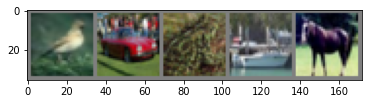

In [15]:
showimages.show_predicted_actual(model, device, testloader, classes)

Okay, now let us see what the neural network thinks these examples above are:



The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



## **Visualize GradCAM**

Use GradCAM to understand where the network is looking at while prediction

In [16]:
target_layers = ["layer1","layer2","layer3","layer4"]
viz_cam = grad_visualize.VisualizeCam(model,classes, target_layers)
print (viz_cam)

In [17]:
len(testloader.dataset)

10000

In [19]:
#GradCam for incorrectly classified images
num_img = 10
incorrect_pred_imgs = []
truth_inds = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(misclassified_imgs[i]["img"]))
  truth_inds.append(misclassified_imgs[i]["target"])
viz_cam(torch.stack(incorrect_pred_imgs), truth_inds, target_layers, metric="incorrect")


IndexError: ignored

In [25]:
num_img = 25
incorrect_pred_imgs = []
truth_inds = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(misclassified_imgs[i]["img"]))
  truth_inds.append(misclassified_imgs[i]["target"])
viz_cam(torch.stack(incorrect_pred_imgs), truth_inds, target_layers, metric="incorrect", per_image=False)

TypeError: ignored

The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [0]:
showimages.evaluate_accuracy(model, device, testloader)

That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [0]:
showimages.evaluate_classwise_accuracy(model, device, classes, testloader)

## **Plot Validation Accuracy**
Plot the change in validation accracy vs epochs

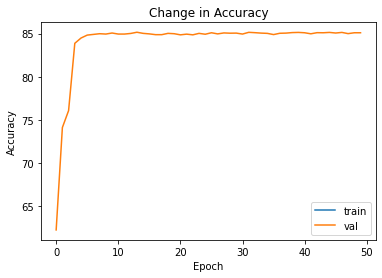

In [26]:
plt_data = {
    "train": train_accs,
    "val": test_accs
}
plotresults.plot_graph(plt_data, "Accuracy")